In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import os



In [2]:
wd = os.path.relpath(os.path.join(os.getcwd(),"..","..","output_eval","bayesian_res.csv"))
results = pd.read_csv(wd)
i = results.describe()
i.iloc[1:,:]

,Learning rate cooperation,Learning rate domination,Escape Aspiration factor,Cost ratio factor,Reward factor,Exit influence,Fire influence,Result
mean,0.594506,0.530539,0.008795,0.568218,0.442542,1.483194,0.972430,0.967123
std,0.258689,0.266913,0.006755,0.129065,0.275484,0.301655,0.320225,0.008508
min,0.094403,0.051460,0.000018,0.278054,0.100790,1.005078,0.512122,0.941892
25%,0.393357,0.291909,0.002756,0.483856,0.200416,1.195276,0.695118,0.962166
50%,0.615349,0.531266,0.007114,0.564277,0.359401,1.501485,0.967993,0.968619
75%,0.821363,0.766989,0.013773,0.645367,0.642865,1.738293,1.261383,0.973666
max,0.997347,0.984315,0.025202,0.928271,0.989778,1.996318,1.485907,0.980955


Text(0.5, 1.0, 'Distribution between exit influence over fire influence')

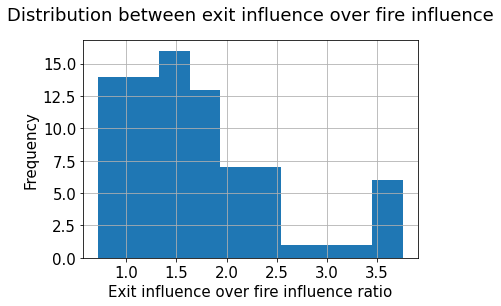

In [3]:
%matplotlib inline
plt.rcParams.update({'font.size': 15})
(results['Exit influence'] /results['Fire influence']).hist()
plt.ylabel("Frequency")
plt.xlabel("Exit influence over fire influence ratio")
plt.title("Distribution between exit influence over fire influence", pad = 20)

## Grid Search

In [81]:
from mpl_toolkits.axes_grid1 import make_axes_locatable # Used to divide the main grid with the colour bar
def display_grid(df : pd.DataFrame, rnge = np.around(np.arange(0.1,1.1,0.1)),decimals=2):
    fig, ax = plt.subplots(1,1,figsize=(15,15)) # create plots and set the figure width and height to 300 x 50

    im = ax.imshow(df['result'].to_numpy().reshape(len(rnge),10),cmap="magma")  
    ax.set_xticks(np.arange(10))
    ax.set_xticklabels(np.around(np.arange(0.1,1.1,0.1),decimals=1))
    ax.set_yticks(np.arange(len(rnge)))
    ax.set_yticklabels(np.around(np.arange(0.1,1.1,0.1),decimals=1))

    ax.tick_params(axis="both",which="major", pad = 15)
    ax.tick_params(axis="both",which="minor", pad = 15)

    # ax.set_xlabel(df.keys()[1])
    # ax.set_ylabel(df.keys()[0])

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05) # create a an axis towards the right of the grid

    cbar = plt.colorbar(im, cax=cax) # plot the color bar

    cbar.ax.set_ylabel("Objective function", rotation=-90, va="bottom",fontsize=20) # add color bar labels
    # Let the horizontal axes labeling appear on top.
    # ax.tick_params(top=True, bottom=False,
    #                 labeltop=True, labelbottom=False)
    ax.set_ylabel("Reward factor",fontsize=30)
    ax.set_xlabel("Ratio factor" ,fontsize=30)
    ax.set_title("Reward / Ratio grid performance", pad = 20)
    plt.show() # show the plot



In [20]:
df = pd.read_csv("../../output_eval/lcld_1.txt")
display_grid(df)


NameError: name 'display_grid' is not defined

(               lc          ld      result
 count  100.000000  100.000000  100.000000
 mean     0.550000    0.550000    1.200761
 std      0.288675    0.288675    0.037356
 min      0.100000    0.100000    1.115801
 25%      0.300000    0.300000    1.175173
 50%      0.550000    0.550000    1.198109
 75%      0.800000    0.800000    1.226978
 max      1.000000    1.000000    1.282374,
 (array([ 4.,  4.,  9., 15., 19., 16., 12., 10.,  7.,  4.]),
  array([1.11580078, 1.13245811, 1.14911545, 1.16577278, 1.18243011,
         1.19908744, 1.21574478, 1.23240211, 1.24905944, 1.26571677,
         1.28237411]),
  <BarContainer object of 10 artists>))

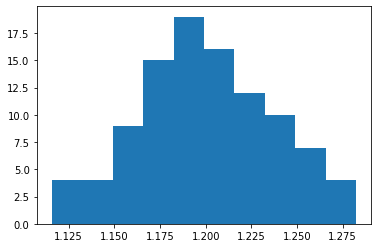

In [ ]:
df.describe(), plt.hist(df["result"])

In [ ]:
df[df["lc"] >= df["ld"]]["result"].mean() , df[df["lc"] >= df["ld"]]["result"].var() ,df[df["lc"] < df["ld"]]["result"].mean()

(1.2030031883027643, 0.0016271953360728927, 1.1980196285857998)

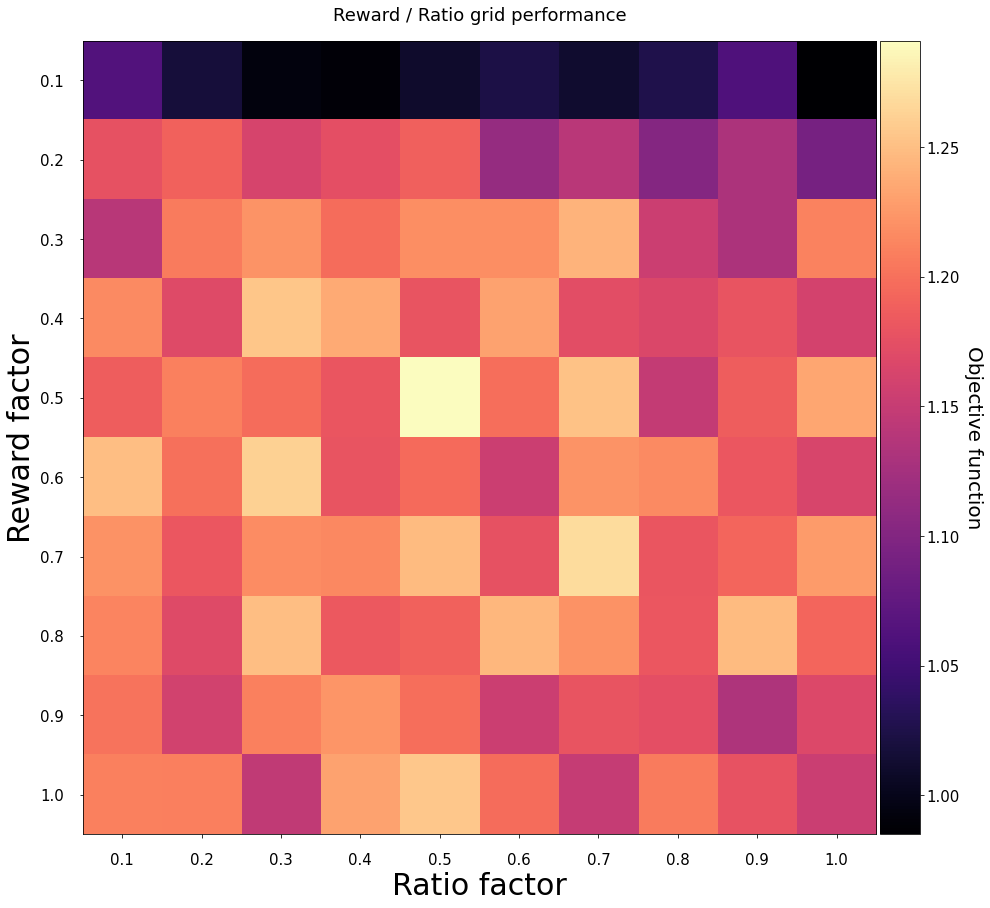

In [82]:
df = pd.read_csv("../../output_eval/ratrew_1.txt")
# df
df = df.iloc[10:,:]
display_grid(df)
#---


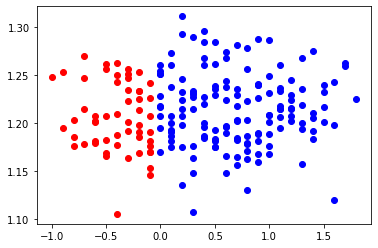

In [ ]:
df = pd.read_csv("../../output_eval/statdyn_1.txt")
# display_grid(df,rnge=np.around(np.arange(0.1,2.1,0.1),decimals=2))
# display_grid(df,rnge=np.around(np.arange(0.1,2.1,0.1),decimals=2))
# df = df[df["result"] > 1.20]
df = df[df["stat"] <= 2.] 
p = df[(df["stat"] - df["dyn"]) >= 0]
plt.scatter(p["stat"] - p["dyn"] ,p["result"],c="blue")
p = df[(df["stat"] - df["dyn"]) < 0] 
plt.scatter(p["stat"] - p["dyn"] ,p["result"],c="red")

In [ ]:
df_more =  df[df["stat"] >= df["dyn"]] 
df_less =  df[df["stat"] < df["dyn"]] 
df_more["result"].describe(), df_less["result"].describe()

(count    145.000000
 mean       1.215079
 std        0.038457
 min        1.107540
 25%        1.188664
 50%        1.215078
 75%        1.238667
 max        1.311378
 Name: result, dtype: float64,
 count    55.000000
 mean      1.206605
 std       0.035561
 min       1.105700
 25%       1.180693
 50%       1.202220
 75%       1.238289
 max       1.269900
 Name: result, dtype: float64)

10